In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import re
mpl.rcParams['font.family'] = 'serif'
import os

In [2]:
current_folder = globals()['_dh'][0]
rootdir = os.path.dirname(os.path.dirname(current_folder))
indir_inter = os.path.join(rootdir, '_2_intermediate', 'data')
indir_prepro = os.path.join(rootdir, '_1_preprocessing', 'data', 'raw', 'gis')
outdir = os.path.join(rootdir, '_3_figures_tables', 'data')

Load sample identifiers and Africa shapefile

In [3]:
nature_sample_id = pd.read_csv(os.path.join(indir_inter, 'table_n_np_bl_fsi_wgis_ic_sd.csv'))[['country', 'ISO', 'nature_sample_identifier']].set_index('ISO', drop=True)
gdf = gpd.read_file(os.path.join(indir_prepro, 'africa_countries', 'africa_countries.shp'))[['iso3', 'geometry']].rename(columns = {'iso3':'ISO'}).set_index('ISO', drop=True)

Join the two

In [4]:
gdf = gdf.join(nature_sample_id, how='left').reset_index(drop=False).fillna(0)

Make sure we have all the countries in the nature sample

In [5]:
gdf[gdf.nature_sample_identifier==1].drop_duplicates(subset=['ISO']).shape[0]==21

True

Make plot

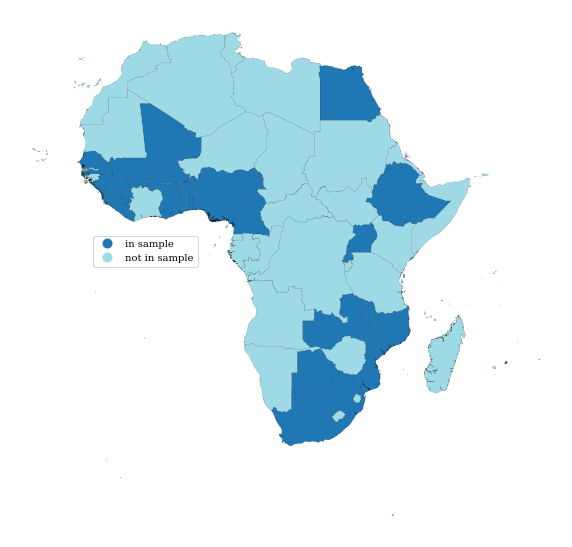

In [6]:
gdf.loc[gdf.nature_sample_identifier==0, 'nature_sample_identifier'] = 2

f, ax = plt.subplots(1,1, figsize=(10, 10))
gdf.plot(ax=ax,
         column="nature_sample_identifier",
         scheme='user_defined',
         classification_kwds={'bins':[1,2]}, 
         cmap = 'tab20',
         edgecolor='k',
         linewidth=0.1,
         legend=True)
ax.axis('off')
ax.grid()
leg = ax.get_legend()
leg.set_bbox_to_anchor((0.15, 0.38, 0.2, 0.2))
leg.texts[0].set_text('in sample')
leg.texts[1].set_text('not in sample')
plt.show()